# Linear models: Support Vector Machines (SVM)

In this notebook we are going to explore linear models and Support Vector Machines (SVM in short).

Let's first import the required packages.

In [1]:
# -- put here your ID number (``numero di matricola'')
ID_number = 7 # COMPLETE

from sklearn import datasets, preprocessing, linear_model, svm
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

## SVM for linearly separable data

Let's start by creating a simple linearly separable dataset for binary classification, where the instance space is $\mathcal{X} =\mathbb{R}^2$ (so that we can visualize it). Just to make things easier, we are going to rescale it too.

In [2]:
# -- dataset.make_blobs: generate isotropic Gaussian blobs for clustering. Params: (see documentation)
# -- n_samples = total number of points equally divided among clusters
# -- centers = the number of centers to generate (that is, number of classes/cluster = 2)
# -- n_features = the number of features for each sample (i.e., points in R^2)
# -- random_state = determines random number generation for dataset creation

In [3]:
X, y = datasets.make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state = ID_number)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

The following code plots the dataset, it is useful for later parts too.

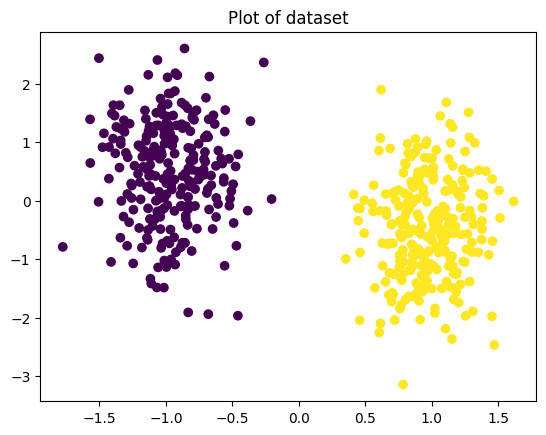

In [4]:
plt.title("Plot of dataset") # -- very simple dataset, since cluster_std = 1.0
plt.scatter(X[:, 0], X[:, 1], c=y);

Now let's run the perceptron, using $\texttt{linear\_model.Perceptron(...)}$ from sklearn. WE fix the number of iterations to 100 so that it runs quickly (since we have a pretty simple to classifiy and linearly separable dataset) , and $\texttt{random\_state=10}$.

What do we expect in terms of training error? 

In [5]:
# -- create a perceptron classifier
# -- TO COMPLETE
model_perceptron_1 = linear_model.Perceptron(max_iter = 100, random_state = 10)

# -- Training the model
# -- TO COMPLETE
model_perceptron_1.fit(X, y)

# -- Get the training error as 1 - score()
# -- TO COMPLETE
training_error = 1 - model_perceptron_1.score(X,y)

# -- Print the training error
# -- TO COMPLETE
print("Training error: ", training_error)

Training error:  0.0


The following code plots the *decision boundary* of a model and the training set. It is useful for later parts too.

In [6]:
# --- model_perceptron should be already trained
def plot_perceptron_boundaries(X, y, model_perceptron):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
    ax = plt.gca()
    plt.title("Plot of perceptron decision boundary")
    xlim = ax.get_xlim() # -- gives a tuple [x_min, x_max]
    ylim = ax.get_ylim()
    # -- create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx) # -- np.meshgrid: returns a tuple of coordinate matrices from coordinate vectors
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # -- np.ravel: returns a contiguous flattened array.
    # -- decision_function predicts confidence score for samples (confidence is proportional to signed distance)
    Z = model_perceptron.decision_function(xy).reshape(XX.shape)
    # -- plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1, linestyles=['-']);

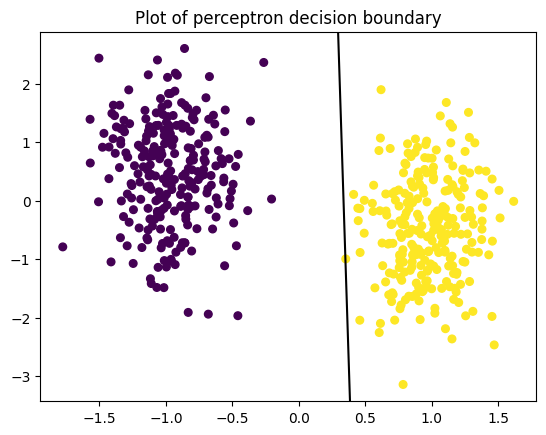

In [7]:
# -- let's print the decision boundaries of model_perceptron_1
plot_perceptron_boundaries(X, y, model_perceptron_1)

If we change the value of $\texttt{random\_state}$ in the perceptron, it will start from a different model. 

Let's run the perceptron with different values of $\texttt{random\_state}$. How will the solution compare to the above?

In [8]:
# -- Create a perceptron classifier
# -- TO COMPLETE
model_perceptron_2 = linear_model.Perceptron(max_iter=100, random_state = 12)

# -- Training the model
# -- TO COMPLETE
model_perceptron_2.fit(X, y)

# -- Get the training error as 1 - score()
# -- TO COMPLETE
training_error = 1 - model_perceptron_2.score(X,y)

# -- Print the training error
# -- TO COMPLETE
print("Training error: ", training_error)

Training error:  0.0


What about the decision boundary? Let's plot it.

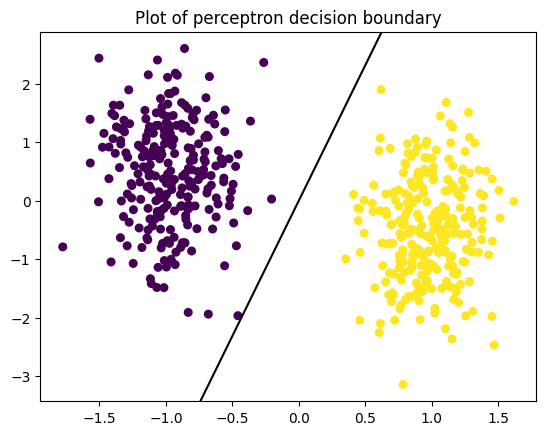

In [9]:
# -- let's print the decision boundaries of model_perceptron_2
plot_perceptron_boundaries(X, y, model_perceptron_2)

Which model is better? 

Is any of these the *best* choice?

Now, let's run the hard-SVM on the same data. To obtain (an almost) hard-SVM in sklearn, we can use $\texttt{svm.SVC(...)}$ with a very high value of the parameter $C$.

Note: the $C$ parameter used by $\texttt{svm.SVC(...)}$ method in sklearn is approximately equal to $1 / \lambda$, with respect to our use and definition of $\lambda$. 

In [10]:
# -- See documentation: C is basically 1\lambda ---> lambda = 1\C 

In [11]:
# -- Creating a SVM model
# -- very high C -> lambda equal to zero 
# -- HARD SVM is implemented with very high values of C (SVC = Support Vector Classification.)
model_svm_1 = svm.SVC(kernel="linear", C=1e8)

# -- Training the model
model_svm_1.fit(X, y)

# -- Get the training error as 1 - score()
training_error = 1 - model_svm_1.score(X,y)

# -- Print the training error
print("Training error: ", training_error)

Training error:  0.0


Plot the SVM decision boundary.

In [12]:
# -- Code for plotting the decision boundary for svm
# -- svm_models must be a list of svm models
def plot_svm_boundaries(X, y, svm_models, show_sv=False, show_margin=False):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
    ax = plt.gca()
    plt.title("Plot of SVM decision boundary")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    palette = [f'C{i}' for i in range(len(svm_models))]
    handles = []

    for idx, svm in enumerate(svm_models):
    
        Z = svm.decision_function(xy).reshape(XX.shape)
        # plot decision boundary and margins
        if show_margin:
            ax.contour(XX, YY, Z, colors = palette[idx], levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
        else:
            ax.contour(XX, YY, Z, colors = palette[idx], levels=[0], alpha=1, linestyles=['-']);
        handles.append(Line2D([0], [0], label=f'SVM {idx+1}', color=palette[idx]))
        if show_sv:
            plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], color = palette[idx], marker='s', alpha=.85)

    ax.legend(handles = handles, loc = 'lower left')


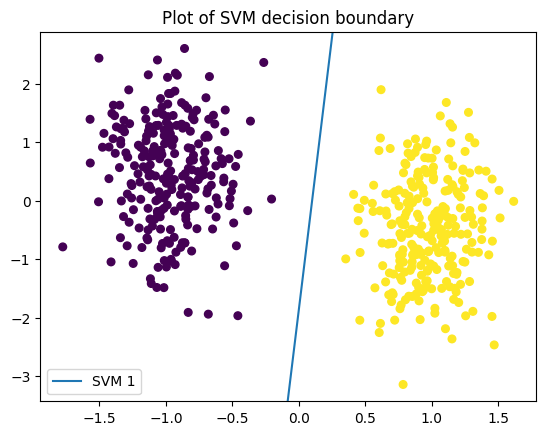

In [13]:
plot_svm_boundaries(X, y, [model_svm_1])

Let's see what the support vectors are. They are defined in attribute $\texttt{support\_vectors\_}$

In [14]:
# -- print the support vectors (attribute support)
# -- TO COMPLETE
print('Support Vectors:\n', model_svm_1.support_vectors_)

print('---')
# -- THIS PRINTS THE COEFFICIENTS OF THE SUPPORT VECTORS, THE ALPHA
# -- alpha coefficients that defines the model w0 = sum_i (alpha_i * x_i), where x_i are the support vectors
print('Dual Coefficients of Support Vectors:\n', model_svm_1.dual_coef_)

Support Vectors:
 [[-0.20498378  0.02693208]
 [ 0.35281708 -0.99697609]
 [ 0.41207829  0.10634759]]
---
Dual Coefficients of Support Vectors:
 [[-5.34267604  0.54301766  4.79965837]]


Equation of the decision boundary: y = 18.673 x + (-1.866)


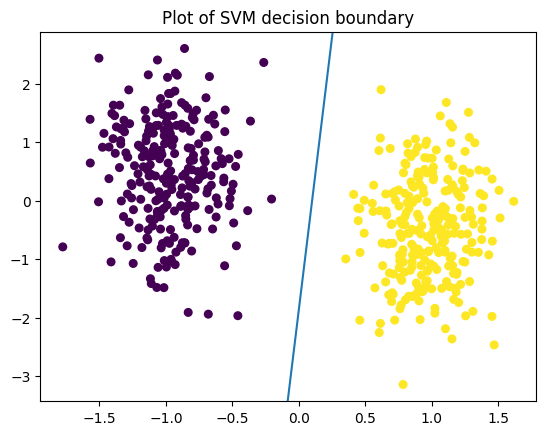

In [15]:
# -- alternative for plotting decision boundaries (for 2D data)
supp_vectors = model_svm_1.support_vectors_
alphas = model_svm_1.dual_coef_
w = np.dot(alphas, supp_vectors).flatten()
b = model_svm_1.intercept_[0]

# -- For 2D data, compute slope (m) and intercept (q) of the line
# -- from <w, x> + b = 0 to y = mx + q -> m = -w_0 / w_1, q = -b / w_1

m = - w[0] / w[1]  # -- Line Slope
q = -b / w[1]   #  -- Line Intercept

print(f"Equation of the decision boundary: y = {m:.3f} x + ({q:.3f})")

plt.scatter(X[:, 0], X[:, 1], c = y, s = 30)
ax = plt.gca()
plt.title("Plot of SVM decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# -- range of values
xvals = np.linspace(xlim[0], xlim[1], 30)
y_vals = m * xvals + q

# -- plot the line
plt.plot(xvals, y_vals)
plt.xlim(xlim);
plt.ylim(ylim);

Let's see what happens moving one support vector. We first obtain the indices of the support vectors.

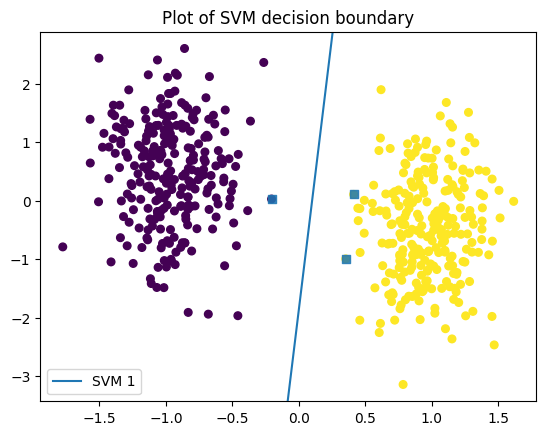

In [16]:
# -- let's actually plot the support vectors
plot_svm_boundaries(X, y, [model_svm_1], show_sv = True)

---

Now, let's try to play a bit with the support vectors, in order to see how the svm model is going to behave.

For instance, let's try to move one of the above support vectors.

In [17]:
# -- print the indices of support vectors (attribute support)
print(model_svm_1.support_)
# -- for example, let's move the point indexed by 321, that is
X[321]

[321 109 417]


array([-0.20498378,  0.02693208])

Now let's move one support vector closer to the points in the same class.

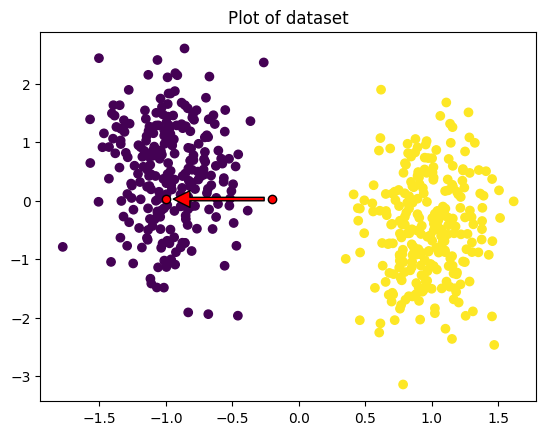

In [18]:
# -- let's copy the data and move one support vector close to the points in the same class
# -- TO COMPLETE
X1 = X.copy()
# the suppport vector indexed by 321 goes from x coordinate ~ -0.2 x coordinate -1
X1[321, 0] = -1

# -- let's plot the new dataset
plt.title("Plot of dataset")
plt.scatter(X1[:, 0], X1[:, 1], c=y)

# -- see the movement of the support vector (then comment to see the whole actual dataset)
plt.scatter(X[321, 0], X[321, 1], color = 'red', edgecolor='k')
plt.scatter(X1[321, 0], X1[321, 1], color = 'red', edgecolor='k')
plt.annotate('', xytext=(X[321, 0], X[321, 1]), xy=(X1[321, 0], X1[321, 1]),
            arrowprops=dict(facecolor='red', shrink=0.07, width=2.5));

Let's run the SVM on the new data.

In [19]:
# -- Creating a SVM model
# -- TO COMPLETE
model_svm_2 = svm.SVC(kernel="linear", C=1e8)

# -- Training the model
# -- TO COMPLETE
model_svm_2.fit(X1, y)

# -- Get the training error as 1 - score()
# -- TO COMPLETE
training_error = 1 - model_svm_2.score(X1,y)

# -- Print the training error
# -- TO COMPLETE
print("Training error: ", training_error)

Training error:  0.0


Plot the SVM decision boundary and the previous decision boundary.

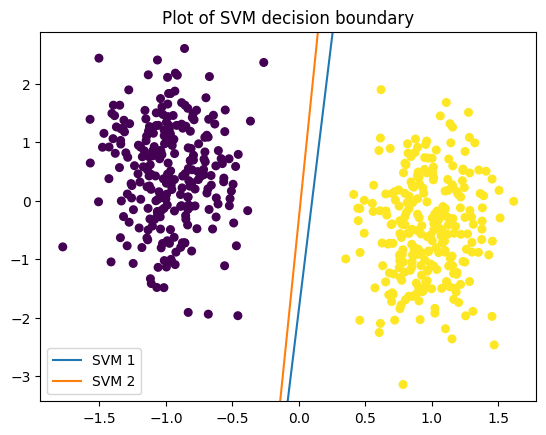

In [20]:
# -- Code for plotting the decision boundary
plot_svm_boundaries(X1, y, [model_svm_1, model_svm_2])

In [21]:
# -- Let's see now what the support vectors are
print('Support Vectors of model 1:\n', model_svm_1.support_vectors_)
print('---')
print('Support Vectors of model 2:\n', model_svm_2.support_vectors_)
print('---')
# -- THIS PRINTS THE COEFFICIENTS OF THE SUPPORT VECTORS, THE ALPHAS
# -- alpha coefficients that defines the model w0 = sum_i (alpha_i * x_i), where x_i are the support vectors
print('Dual Coefficients of Support Vectors of model 1:\n', model_svm_1.dual_coef_)
print('---')
print('Dual Coefficients of Support Vectors of model 2:\n', model_svm_2.dual_coef_)

Support Vectors of model 1:
 [[-0.20498378  0.02693208]
 [ 0.35281708 -0.99697609]
 [ 0.41207829  0.10634759]]
---
Support Vectors of model 2:
 [[-0.45836856 -1.96853588]
 [-0.2637712   2.36361175]
 [ 0.35281708 -0.99697609]]
---
Dual Coefficients of Support Vectors of model 1:
 [[-5.34267604  0.54301766  4.79965837]]
---
Dual Coefficients of Support Vectors of model 2:
 [[-2.61226021 -0.79002101  3.40228122]]


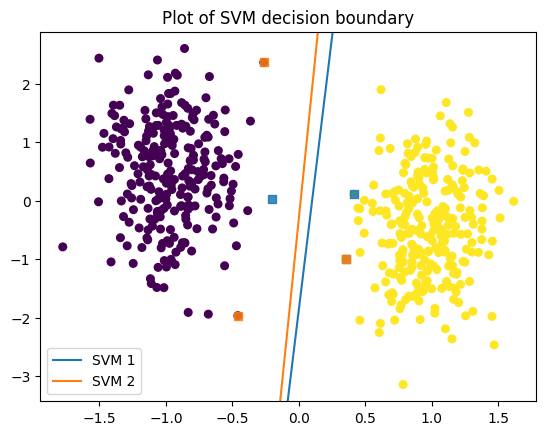

In [22]:
plot_svm_boundaries(X1, y, [model_svm_1, model_svm_2], show_sv = True)

---

Now let's move the same support vector to the right, i.e., closer to the points in the other class.

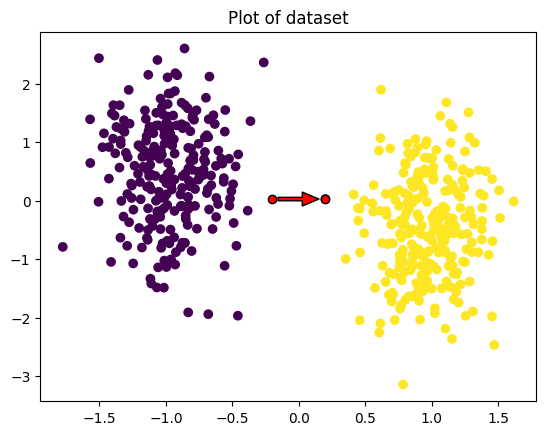

In [23]:
# -- let's copy the original data and move one support vector close to the points in the other class
# -- TO COMPLETE
X2 = X.copy()
X2[321, 0] = 0.2

# -- let's plot the new dataset
plt.title("Plot of dataset")
plt.scatter(X2[:, 0], X2[:, 1], c=y)

# -- see the movement of the support vector (then comment to see the whole actual dataset)
plt.scatter(X[321, 0], X[321, 1], color = 'red', edgecolor='k')
plt.scatter(X2[321, 0], X2[321, 1], color = 'red', edgecolor='k')
plt.annotate('', xytext=(X[321, 0], X[321, 1]), xy=(X2[321, 0], X2[321, 1]),
            arrowprops=dict(facecolor='red', shrink=0.12, width=2.5, headwidth=10.0));

Let's run the SVM on the new data.

In [24]:
# -- Creating a SVM model
# -- TO COMPLETE
model_svm_3 = svm.SVC(kernel="linear", C=1e8)

# -- Training the model
model_svm_3.fit(X2, y)

# -- Get the training error as 1 - score()
training_error = 1 - model_svm_3.score(X2,y)

# -- Print the training error
print("Training error: ", training_error)

Training error:  0.0


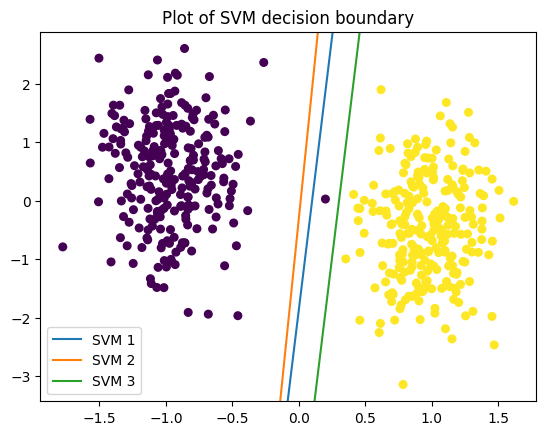

In [25]:
plot_svm_boundaries(X2, y, [model_svm_1, model_svm_2, model_svm_3])

Let's plot the new decision boundary, and the old ones too.

In [26]:
# -- Let's see now what the support vectors are
print('Support Vectors of model 1:\n', model_svm_1.support_vectors_)
print('---')
print('Support Vectors of model 2:\n', model_svm_2.support_vectors_)
print('---')
print('Support Vectors of model 3:\n', model_svm_3.support_vectors_)

Support Vectors of model 1:
 [[-0.20498378  0.02693208]
 [ 0.35281708 -0.99697609]
 [ 0.41207829  0.10634759]]
---
Support Vectors of model 2:
 [[-0.45836856 -1.96853588]
 [-0.2637712   2.36361175]
 [ 0.35281708 -0.99697609]]
---
Support Vectors of model 3:
 [[ 0.2         0.02693208]
 [ 0.35281708 -0.99697609]
 [ 0.41207829  0.10634759]]


In [27]:
print('Dual Coefficients of Support Vectors of model 1:\n', model_svm_1.dual_coef_)
print('---')
print('Dual Coefficients of Support Vectors of model 2:\n', model_svm_2.dual_coef_)
print('---')
print('Dual Coefficients of Support Vectors of model 3:\n', model_svm_3.dual_coef_)

Dual Coefficients of Support Vectors of model 1:
 [[-5.34267604  0.54301766  4.79965837]]
---
Dual Coefficients of Support Vectors of model 2:
 [[-2.61226021 -0.79002101  3.40228122]]
---
Dual Coefficients of Support Vectors of model 3:
 [[-46.42824463   3.81081395  42.61743068]]


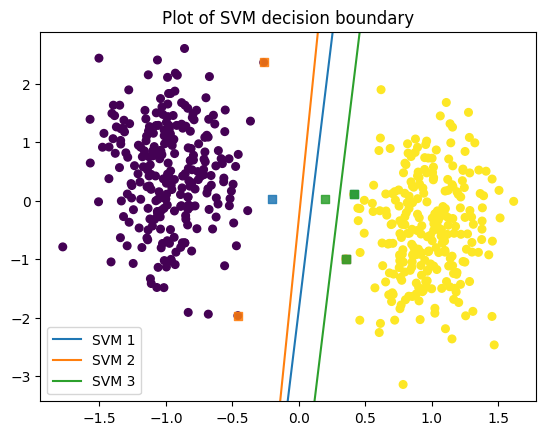

In [28]:
plot_svm_boundaries(X1, y, [model_svm_1, model_svm_2, model_svm_3], show_sv = True)

In [29]:
# -- does this model make sense for this example? Maybe a support vector in the training set can be an outlier. 
# -- sometimes we want to tradeoff between the training error and the support vectors in order to allow some violations
# -- this also make sense when the training set is not linearly separable !!

## SVM for non-linearly separable data

Let's make a dataset that is not linearly separble, and let's plot it.

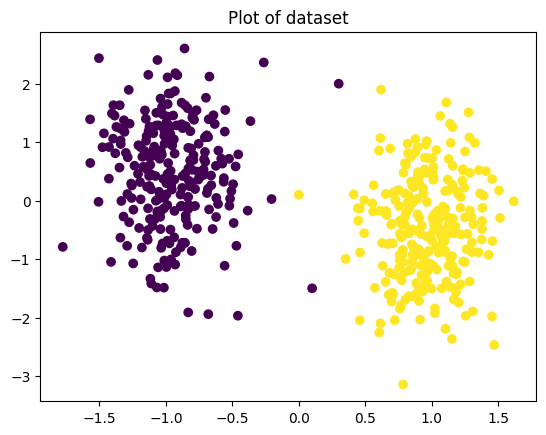

In [30]:
# -- TO COMPLETE
X_nls, y_nls = datasets.make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state = ID_number)

scaler.fit(X_nls)
X_nls = scaler.transform(X_nls)

# -- let's manually create a nls dataset
a = np.array([[0.3, 2]])
b = np.array([0])
X_nls =np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))
a = np.array([[0.1, -1.5]])
b = np.array([0])
X_nls = np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))

a = np.array([[0, 0.1]])
b = np.array([1])
X_nls =np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))

plt.title("Plot of dataset")
plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls);

Let's try to learn a hard-SVM. It means that the parameter C, which is approximately equal to $1/\lambda$ with $\lambda$ as in our slides.

In [31]:
# -- Creating a HARD SVM model (again, with large value of C)
# -- TO COMPLETE
model_hard_svm_1 = svm.SVC(kernel="linear", C=1e8)

# -- Training the model
model_hard_svm_1.fit(X_nls, y_nls)

# -- Get the training error as 1 - score()
training_error = 1 - model_hard_svm_1.score(X_nls, y_nls)

# -- Print the training error (corresponds to ~ 1 misclassified point over 500)
print("Training error: ", training_error)

Training error:  0.001988071570576566


The following code plots the decision boundary, as well as the margin.

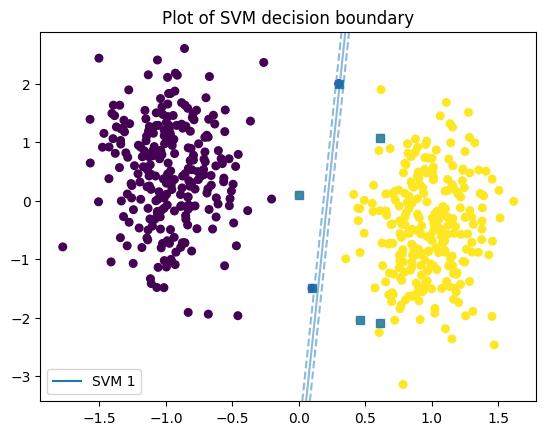

In [32]:
# -- Plot of hard SVM decision boundary
plot_svm_boundaries(X_nls, y_nls, [model_hard_svm_1], show_sv=True, show_margin=True)

In [33]:
# -- Let's see now what the support vectors are
print('Support Vectors of model 1:\n', model_hard_svm_1.support_vectors_)
print('---')
print('Dual Coefficients of Support Vectors of model 1:\n', model_hard_svm_1.dual_coef_)

Support Vectors of model 1:
 [[ 0.3         2.        ]
 [ 0.1        -1.5       ]
 [ 0.61370643 -2.10055854]
 [ 0.61353407  1.07014634]
 [ 0.45854805 -2.04610754]
 [ 0.          0.1       ]]
---
Dual Coefficients of Support Vectors of model 1:
 [[-4.57453439e+07 -1.00000000e+08  9.49743870e+06  8.21747044e+06
   2.80304347e+07  1.00000000e+08]]


Let's try with a smaller value of C ($10^4$), that corresponds to larger value of $\lambda$.

What do you expect?

In [34]:
# -- Creating a soft SVM model
# -- TO COMPLETE
model_soft_svm_2 = svm.SVC(kernel="linear", C=1e4)

# -- Training the model
model_soft_svm_2.fit(X_nls, y_nls)

# -- Get the training error as 1 - score()
training_error = 1 - model_soft_svm_2.score(X_nls, y_nls)

# -- Print the training error (HIGHER TRAINING ERROR -> since we care more about the regularization term)
# -- the following training_error corresponds to 2 misclassified points
print("Training error: ", training_error)

Training error:  0.003976143141153132


What about the decision boundary and the margin?

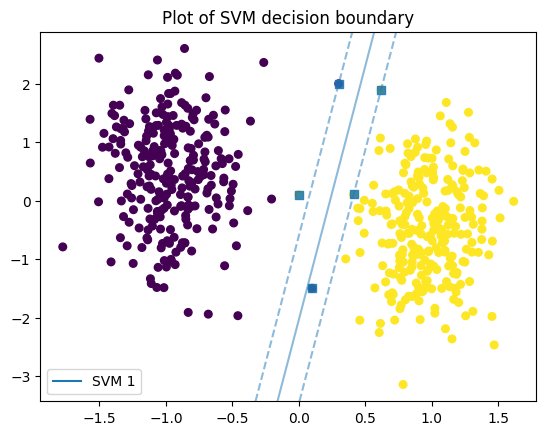

In [35]:
# -- Plot of hard SVM decision boundary
plot_svm_boundaries(X_nls, y_nls, [model_soft_svm_2], show_sv=True, show_margin=True)

In [36]:
# -- Let's see now what the support vectors are
print('Support Vectors of model 1:\n', model_hard_svm_1.support_vectors_)
print('---')
print('Support Vectors of model 2:\n', model_soft_svm_2.support_vectors_)

Support Vectors of model 1:
 [[ 0.3         2.        ]
 [ 0.1        -1.5       ]
 [ 0.61370643 -2.10055854]
 [ 0.61353407  1.07014634]
 [ 0.45854805 -2.04610754]
 [ 0.          0.1       ]]
---
Support Vectors of model 2:
 [[ 0.3         2.        ]
 [ 0.1        -1.5       ]
 [ 0.61835045  1.89793698]
 [ 0.41207829  0.10634759]
 [ 0.          0.1       ]]


In [37]:
# -- TO COMPLETE
print('Dual Coefficients of Support Vectors for model 1:\n', model_hard_svm_1.dual_coef_)
print('---')
# -- enhance the difference between dual coeffs: model 2 gives higher weight to regularization term in the loss
print('Dual Coefficients of Support Vectors for model 2:\n', model_soft_svm_2.dual_coef_)

Dual Coefficients of Support Vectors for model 1:
 [[-4.57453439e+07 -1.00000000e+08  9.49743870e+06  8.21747044e+06
   2.80304347e+07  1.00000000e+08]]
---
Dual Coefficients of Support Vectors for model 2:
 [[ -8628.48343686 -10000.            189.02277909   8439.46065777
   10000.        ]]


Let's repeat everything for an even smaller C, i.e., C = 100

In [38]:
# -- Creating a soft SVM model
# -- TO COMPLETE
model_soft_svm_3 = svm.SVC(kernel="linear", C=100)

# -- Training the model
model_soft_svm_3.fit(X_nls, y_nls)

# -- Get the training error as 1 - score()
training_error = 1 - model_soft_svm_3.score(X_nls, y_nls)

# -- Print the training error (seems to be exactly the same as before)
print("Training error: ", training_error)

Training error:  0.003976143141153132


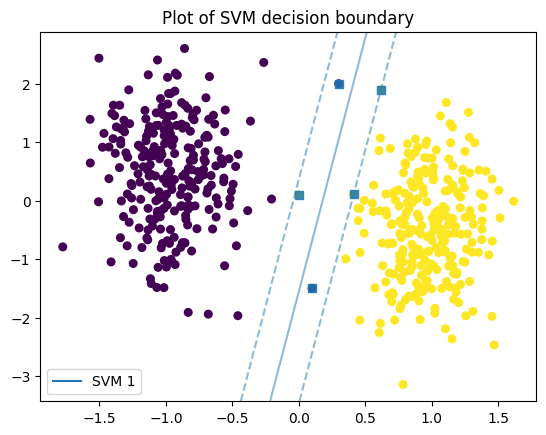

In [39]:
plot_svm_boundaries(X_nls, y_nls, [model_soft_svm_3], show_sv=True, show_margin=True)

What about setting C = 1?

In [40]:
# -- Creating a soft SVM model 
model_soft_svm_4 = svm.SVC(kernel="linear", C=1)

# -- Training the model
model_soft_svm_4.fit(X_nls, y_nls)

# -- Get the training error as 1 - score()
training_error = 1 - model_soft_svm_4.score(X_nls, y_nls)

# -- Print the training error (corresponds to 3 misclassified points)
print("Training error: ", training_error)

Training error:  0.005964214711729587


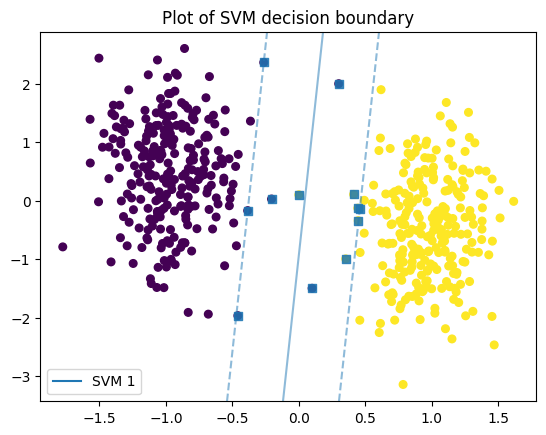

In [41]:
plot_svm_boundaries(X_nls, y_nls, [model_soft_svm_4], show_sv=True, show_margin=True)

Let's see what are the support vectors.

In [42]:
# -- TO COMPLETE
print('Support Vectors of model 4:\n\n', model_soft_svm_4.support_vectors_)
print('---')
print('Dual Coefficients of Support Vectors for model 4:\n\n', model_soft_svm_4.dual_coef_)

Support Vectors of model 4:

 [[-0.38439002 -0.17140959]
 [-0.45836856 -1.96853588]
 [-0.20498378  0.02693208]
 [-0.2637712   2.36361175]
 [ 0.3         2.        ]
 [ 0.1        -1.5       ]
 [ 0.35281708 -0.99697609]
 [ 0.44659129 -0.34328506]
 [ 0.45899808 -0.13615956]
 [ 0.41207829  0.10634759]
 [ 0.44373116 -0.12888489]
 [ 0.          0.1       ]]
---
Dual Coefficients of Support Vectors for model 4:

 [[-0.92797629 -1.         -1.         -0.18438328 -1.         -1.
   1.          1.          0.11235957  1.          1.          1.        ]]


### Comparison with Perceptron

Just for comparison, let's run the perceptron on the same dataset with various initial random states

Let's plot the decision boundary.

In [43]:
# -- TO COMPLETE
# -- let's try with other perceptron models (with different random states)

Training error:  0.003976143141153132


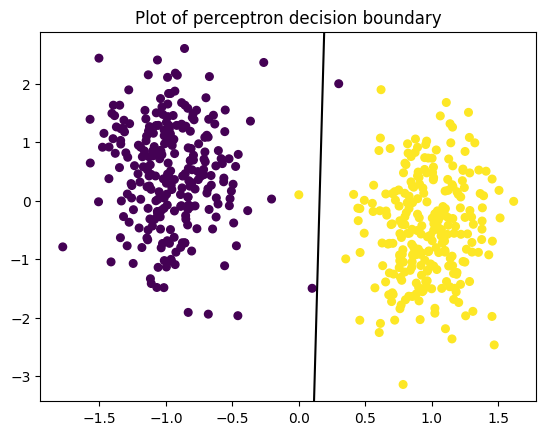

In [44]:
# -- random state = [143, 10, 24]
model_perceptron_1 = linear_model.Perceptron(max_iter=100, random_state = 143)
model_perceptron_1.fit(X_nls, y_nls)
training_error = 1 - model_perceptron_1.score(X_nls, y_nls)
print("Training error: ", training_error)
plot_perceptron_boundaries(X_nls, y_nls, model_perceptron_1)

Training error:  0.007952286282306154


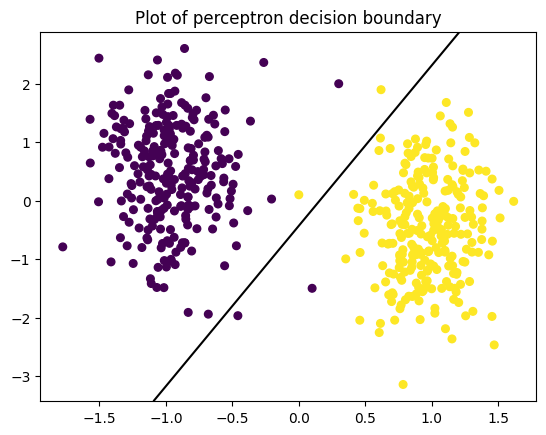

In [45]:
model_perceptron_2 = linear_model.Perceptron(max_iter=100, random_state = 10)
model_perceptron_2.fit(X_nls, y_nls)
training_error = 1 - model_perceptron_2.score(X_nls, y_nls)
print("Training error: ", training_error)
plot_perceptron_boundaries(X_nls, y_nls, model_perceptron_2)

Training error:  0.017892644135188873


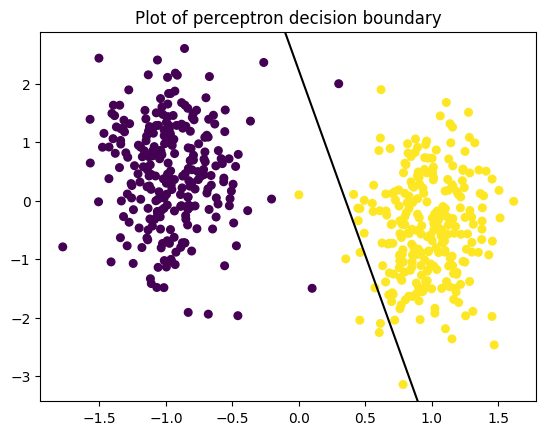

In [46]:
model_perceptron_3 = linear_model.Perceptron(max_iter=100, random_state = 24)
model_perceptron_3.fit(X_nls, y_nls)
training_error = 1 - model_perceptron_3.score(X_nls, y_nls)
print("Training error: ", training_error)
plot_perceptron_boundaries(X_nls, y_nls, model_perceptron_3)

### K-Fold Cross Validation

Now, let's try to select the best SVM model using $k$-fold cross validation, with respect to the parameter $C$.

More specifically, let's fix a non-linearly separable dataset. You need to perform train-validation-test split, fix a grid for the hyperparameter $C$, and perform model selection by running $k$-fold cross validations (let's say $k = 5$, but you can try to change).

At the end, we would like to collect the best models, in terms of generalization error, achieved by you. 

In [47]:
# -- generate the dataset
X, Y = datasets.make_blobs(n_samples = 1000, centers = 2, n_features = 2, 
                            center_box=(-7.5, 7.5), random_state = 37, cluster_std = 2.8)

# -- divide in: train = 2/3, val = test = 1/6

# -- perform train-val-test split
# -- fix k of k-fold = 5 (for example)

m = X.shape[0] # = 1000
m_train = int(2/3 * m)
m_val = (m - m_train) // 2
m_test = m - m_train - m_val

# -- print sizes
print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for validation (choosing among different models):", m_val)
print("Amount of data for test:", m_test)

Amount of data for training and deciding parameters: 666
Amount of data for validation (choosing among different models): 167
Amount of data for test: 167


In [48]:
# -- let's use built-in function from scikit-learn to split the data
from sklearn.model_selection import train_test_split

X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size = m_test, random_state = ID_number)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = m_val, random_state = ID_number)

In [49]:
# -- let's check if the sizes match
print(f'X_train size: {X_train.shape}, Y_train size: {Y_train.shape}')
print(f'X_val size: {X_val.shape}, Y_val size: {Y_val.shape}')
print(f'X_test size: {X_test.shape}, Y_test size: {Y_test.shape}')

X_train size: (666, 2), Y_train size: (666,)
X_val size: (167, 2), Y_val size: (167,)
X_test size: (167, 2), Y_test size: (167,)


In [50]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_and_val_scaled = scaler.transform(X_train_and_val)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [51]:
# -- let's check if the scaler did his job
print(f'X_train mean: {np.mean(X_train_scaled)}, X_train std: {np.std(X_train_scaled)}')
print(f'X_val mean: {np.mean(X_val_scaled)}, X_val std: {np.std(X_val_scaled)}')
print(f'X_test mean: {np.mean(X_test_scaled)}, X_test std: {np.std(X_test_scaled)}')

X_train mean: -7.868247261607716e-17, X_train std: 1.0000000000000002
X_val mean: -0.0583753476844406, X_val std: 1.0153347967252957
X_test mean: 0.032578079503637294, X_test std: 1.0252668472240394


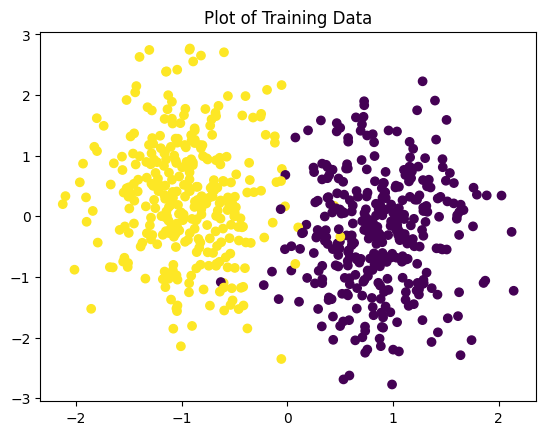

In [52]:
plt.title("Plot of Training Data")
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = Y_train);

In [53]:
# -- grid of hyperparams
C_grid = np.logspace(0, 5, num = 30)

In [54]:
from sklearn.model_selection import KFold

num_folds = 5

kf = KFold(n_splits = num_folds)

err_train_kfold = np.zeros(len(C_grid),)
err_val_kfold = np.zeros(len(C_grid),)

In [55]:
# -- perform kfold validation for model selection (k = 5)
for i, c in enumerate(C_grid):
    
    model_svm = svm.SVC(kernel="linear", C = c)

    print(f'#{i+1} Performing k-fold for C = {c}...')

    for train_index, validation_index in kf.split(X_train_and_val_scaled):
        
        # print(train_index)
        X_train_kfold, X_val_kfold = X_train_and_val_scaled[train_index], X_train_and_val_scaled[validation_index]
        Y_train_kfold, Y_val_kfold = Y_train_and_val[train_index], Y_train_and_val[validation_index]

        # -- data scaling: standardize features with respect to the current folds
        scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
        X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
        X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
          
        # -- learn the model using the training data from the k-fold
        model_svm.fit(X_train_kfold_scaled, Y_train_kfold)
        
        # -- compute the loss using the validation data from the k-fold
        Y_pred_train = model_svm.predict(X_train_kfold_scaled)
        Y_pred_val = model_svm.predict(X_val_kfold_scaled)
        
        # -- incremental mean
        err_train_kfold[i] += (1 - model_svm.score(X_train_kfold_scaled, Y_train_kfold))
        err_val_kfold[i] += (1 - model_svm.score(X_val_kfold_scaled, Y_val_kfold))

# -- compute the mean => estimate of validation losses and errors for each lam
err_train_kfold /= num_folds
err_val_kfold /= num_folds

# -- choose the regularization parameter that minimizes the loss
print('\n---\n')
C_opt = C_grid[np.argmin(err_val_kfold)]
print('Best value of the C parameter:', C_opt)
print('Min validation (1 - R²) ', np.min(err_val_kfold))

#1 Performing k-fold for C = 1.0...
#2 Performing k-fold for C = 1.4873521072935114...
#3 Performing k-fold for C = 2.2122162910704493...
#4 Performing k-fold for C = 3.2903445623126686...
#5 Performing k-fold for C = 4.893900918477494...
#6 Performing k-fold for C = 7.278953843983151...
#7 Performing k-fold for C = 10.826367338740546...
#8 Performing k-fold for C = 16.102620275609393...
#9 Performing k-fold for C = 23.95026619987486...
#10 Performing k-fold for C = 35.622478902624444...
#11 Performing k-fold for C = 52.9831690628371...
#12 Performing k-fold for C = 78.80462815669912...
#13 Performing k-fold for C = 117.21022975334806...
#14 Performing k-fold for C = 174.3328822199989...
#15 Performing k-fold for C = 259.2943797404667...
#16 Performing k-fold for C = 385.6620421163472...
#17 Performing k-fold for C = 573.6152510448682...
#18 Performing k-fold for C = 853.1678524172814...
#19 Performing k-fold for C = 1268.9610031679233...
#20 Performing k-fold for C = 1887.391822135097

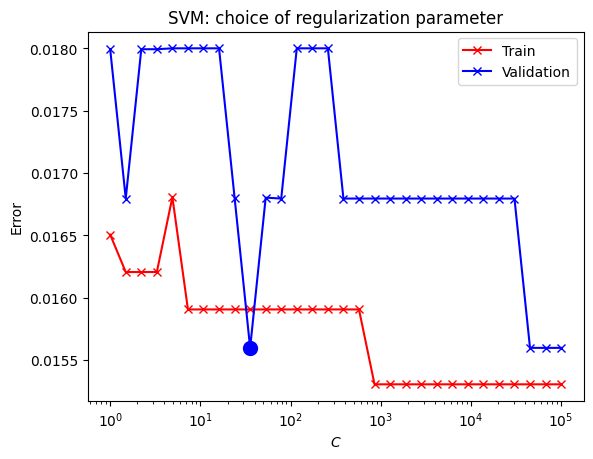

In [56]:
# let's plot the error as a function of the C parameter
plt.xscale('log')
plt.plot(C_grid, err_train_kfold, color='r', marker='x')
plt.plot(C_grid, err_val_kfold, color='b', marker='x')
# -- highlight min loss
plt.scatter(C_opt, np.min(err_val_kfold), color='b', marker='o', linewidths=5)
plt.legend(['Train', 'Validation'])
plt.xlabel(r'$C$')
plt.ylabel('Error')
plt.title('SVM: choice of regularization parameter')
plt.show()

In [57]:
# -- retrain the final model using the best found hyperparameters
final_model = svm.SVC(kernel="linear", C = C_opt)
final_model.fit(X_train_and_val_scaled, Y_train_and_val)

SVC(C=np.float64(35.622478902624444), kernel='linear')

Training error:  0.015606242496998823
Number of support vectors: 38


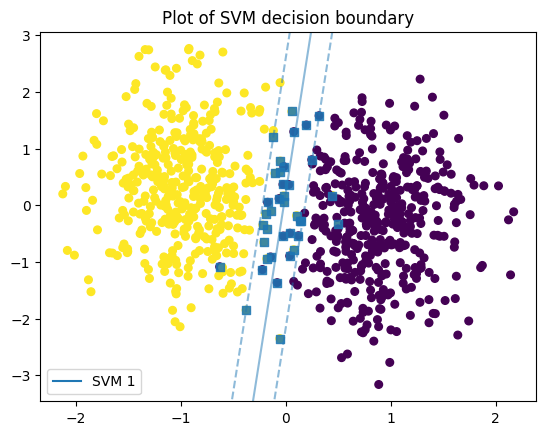

In [58]:
training_error = 1 - final_model.score(X_train_and_val_scaled, Y_train_and_val)
print("Training error: ", training_error)
plot_svm_boundaries(X_train_and_val_scaled, Y_train_and_val, [final_model], show_sv=True, show_margin=True)
print('Number of support vectors:', len(final_model.support_vectors_))

In [59]:
# -- test generalization error
generalization_error = 1 - final_model.score(X_test_scaled, Y_test)
print('Generalization Error of best model:', generalization_error)

Generalization Error of best model: 0.029940119760479056


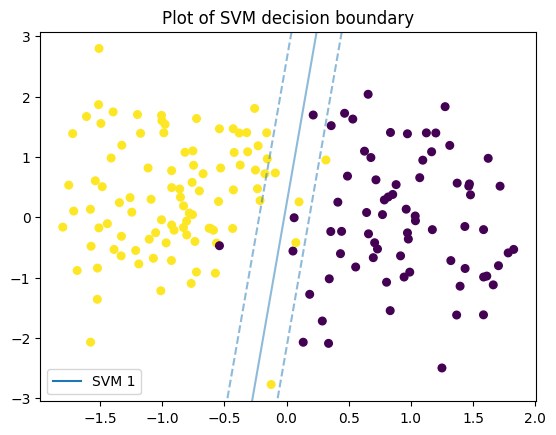

In [60]:
plot_svm_boundaries(X_test_scaled, Y_test, [final_model], show_sv=False, show_margin=True)

### Comparison with Perceptron

Finally, let's compare the best model obtained above with some perceptrons. 

Training error:  0.027611044417767072


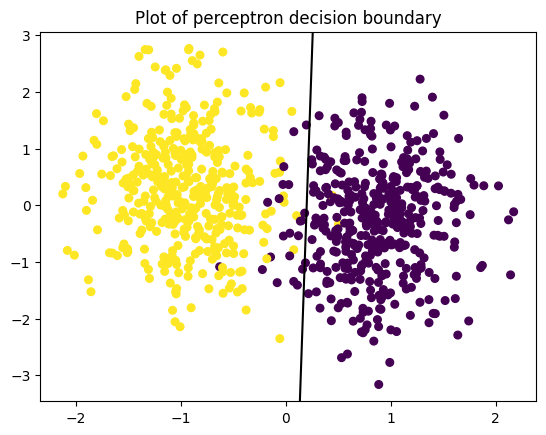

In [61]:
perceptron_1 = linear_model.Perceptron(max_iter=100, random_state = 143)
perceptron_1.fit(X_train_and_val_scaled, Y_train_and_val)
training_error = 1 - perceptron_1.score(X_train_and_val_scaled, Y_train_and_val)
print("Training error: ", training_error)
plot_perceptron_boundaries(X_train_and_val_scaled, Y_train_and_val, perceptron_1)

Generalization Error: 0.0359281437125748


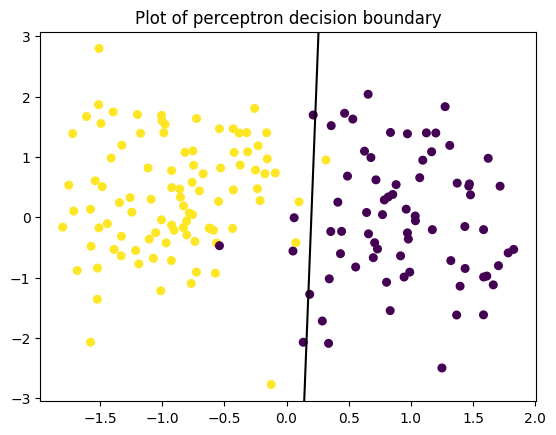

In [62]:
# -- test generalization error
generalization_error = 1 - perceptron_1.score(X_test_scaled, Y_test)
print('Generalization Error:', generalization_error)
plot_perceptron_boundaries(X_test_scaled, Y_test, perceptron_1)

In [63]:
# -- you may try with different seeds